# **Rental Demand Analysis and Prediction**

This project is to analyze and model bike rental demand. Using real-world data—including rental timestamps, weather conditions, season, and holidays—I uncover key patterns in customer usage and build machine learning models to predict future demand. This project covers data cleaning, exploratory analysis, feature engineering, and modeling.

For model evaluation, RMSLE (Root Mean Squared Logarithmic Error) was used as the scoring metric.
RMSLE measures the difference between the logarithms of the predicted and actual values. It is especially suitable for regression problems with skewed target distributions or when the goal is to penalize underestimations and overestimations equally.

### **Data Description**

- datetime: The date and hour of the bike rental (year-month-day-hour)

- season: 1: Spring, 2: Summer, 3: Fall, 4: Winter

- holiday: 1: holiday, 0: otherwise

- workingday: 1: working day, 0: weekend or holiday

- temp: Temperature in Celsius

- atemp: Wind chill

- humidity: Humidity level

- windspeed: Wind speed

- registered: Number of rentals by registered (subscribed) users

- casual: Number of rentals by casual (non-registered) users

- count: Total number of rentals (sum of registered and casual users)

## **Data Exploration**

In [ ]:
import numpy as np
import pandas as pd
!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import missingno as msno

plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (20, 5)

import warnings
warnings.filterwarnings('ignore')

Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DataAnalytics/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DataAnalytics/test.csv')
prediction_df = pd.read_csv('/content/drive/MyDrive/DataAnalytics/prediction.csv')

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train_df.shape

(10886, 12)

In [ ]:
test_df.shape

(6493, 9)

In [ ]:
train_df.columns, len(train_df.columns)

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 12)

In [ ]:
test_df.columns, len(test_df.columns)

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed'],
       dtype='object'),
 9)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


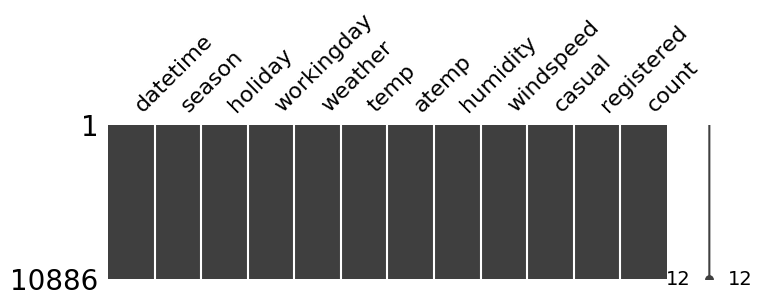

In [ ]:
msno.matrix(train_df, figsize=(8,2));

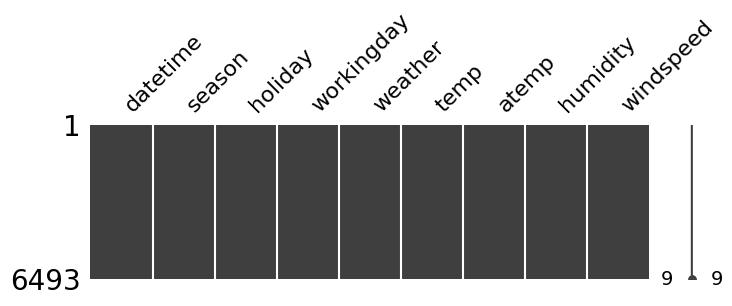

In [ ]:
msno.matrix(test_df, figsize=(8,2));

In [ ]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
train_df.describe(include='object')

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


**Extracting features from the datetime variable**

In [ ]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute'] = train_df['datetime'].dt.minute
train_df['second'] = train_df['datetime'].dt.second
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [ ]:
print(train_df['minute'].value_counts())
print(train_df['second'].value_counts())

minute
0    10886
Name: count, dtype: int64
second
0    10886
Name: count, dtype: int64


In [ ]:
train_df = train_df.drop(['minute', 'second'], axis=1)
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['day'] = test_df['datetime'].dt.day
test_df['hour'] = test_df['datetime'].dt.hour

**Correlation matrix**

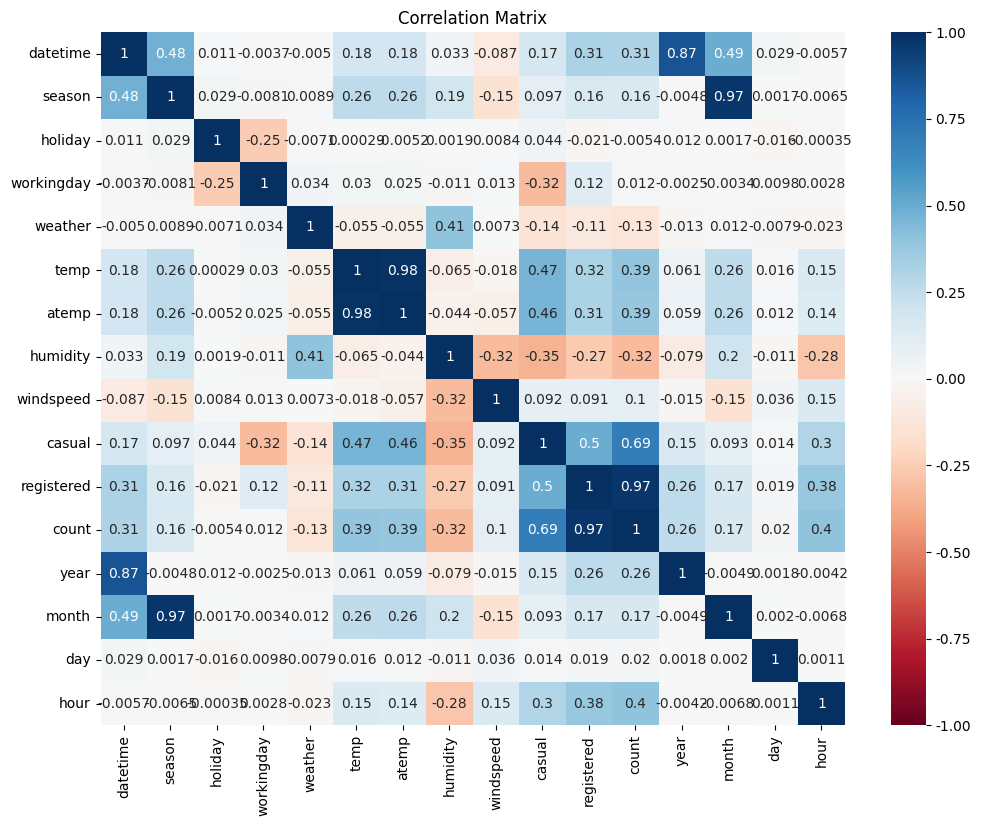

In [ ]:
df = pd.DataFrame(train_df)
correlation_matrix = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = pd.DataFrame(train_df).corr()
abs_corr = correlation_matrix['count'].abs().drop('count')
top10 = abs_corr.nlargest(10).to_frame('corr_score').reset_index()
top10.columns = ['features', 'score']
print('Top 10 Absolute Correlations with count:')
top10

Top 10 Absolute Correlations with count:


,features,score
0,registered,0.970948
1,casual,0.690414
2,hour,0.400601
3,temp,0.394454
4,atemp,0.389784
5,humidity,0.317371
6,datetime,0.310187
7,year,0.260403
8,month,0.166862
9,season,0.163439


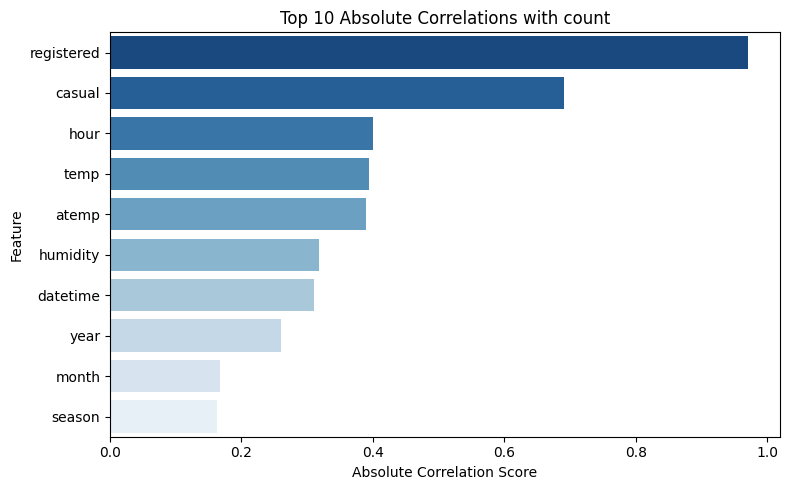

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=top10, x='score', y='features', palette='Blues_r')
plt.title('Top 10 Absolute Correlations with count')
plt.xlabel('Absolute Correlation Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

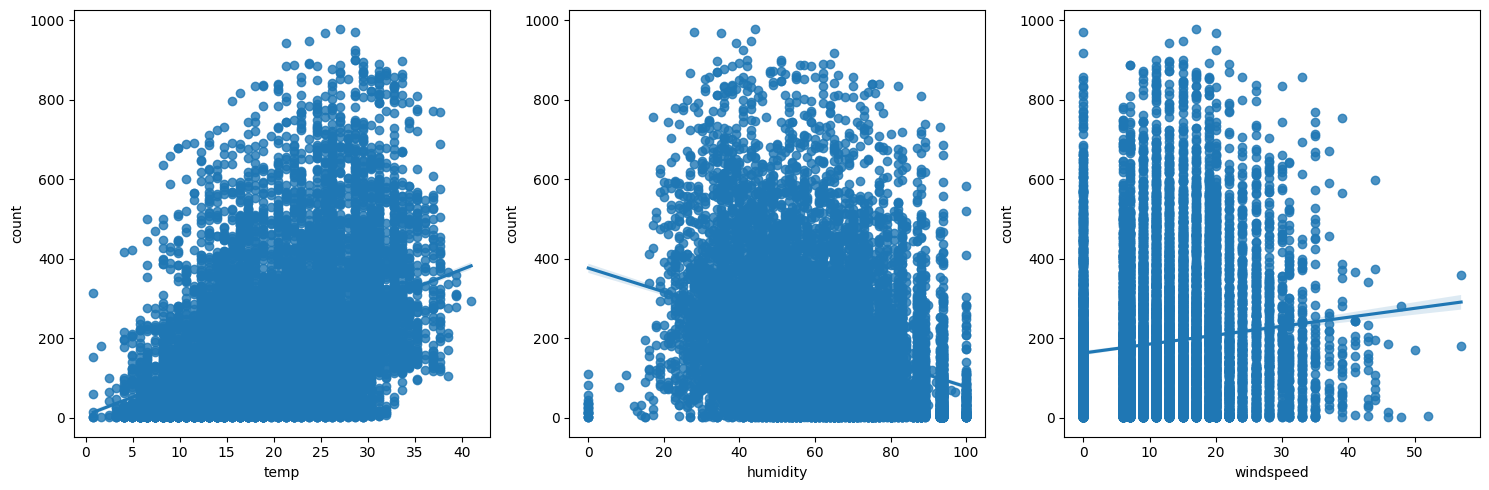

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.regplot(x="temp", y="count", data=train_df, ax=ax1)
sns.regplot(x="humidity", y="count", data=train_df, ax=ax2)
sns.regplot(x="windspeed", y="count", data=train_df, ax=ax3)
plt.tight_layout()
plt.show()

**Outliers Analysis**

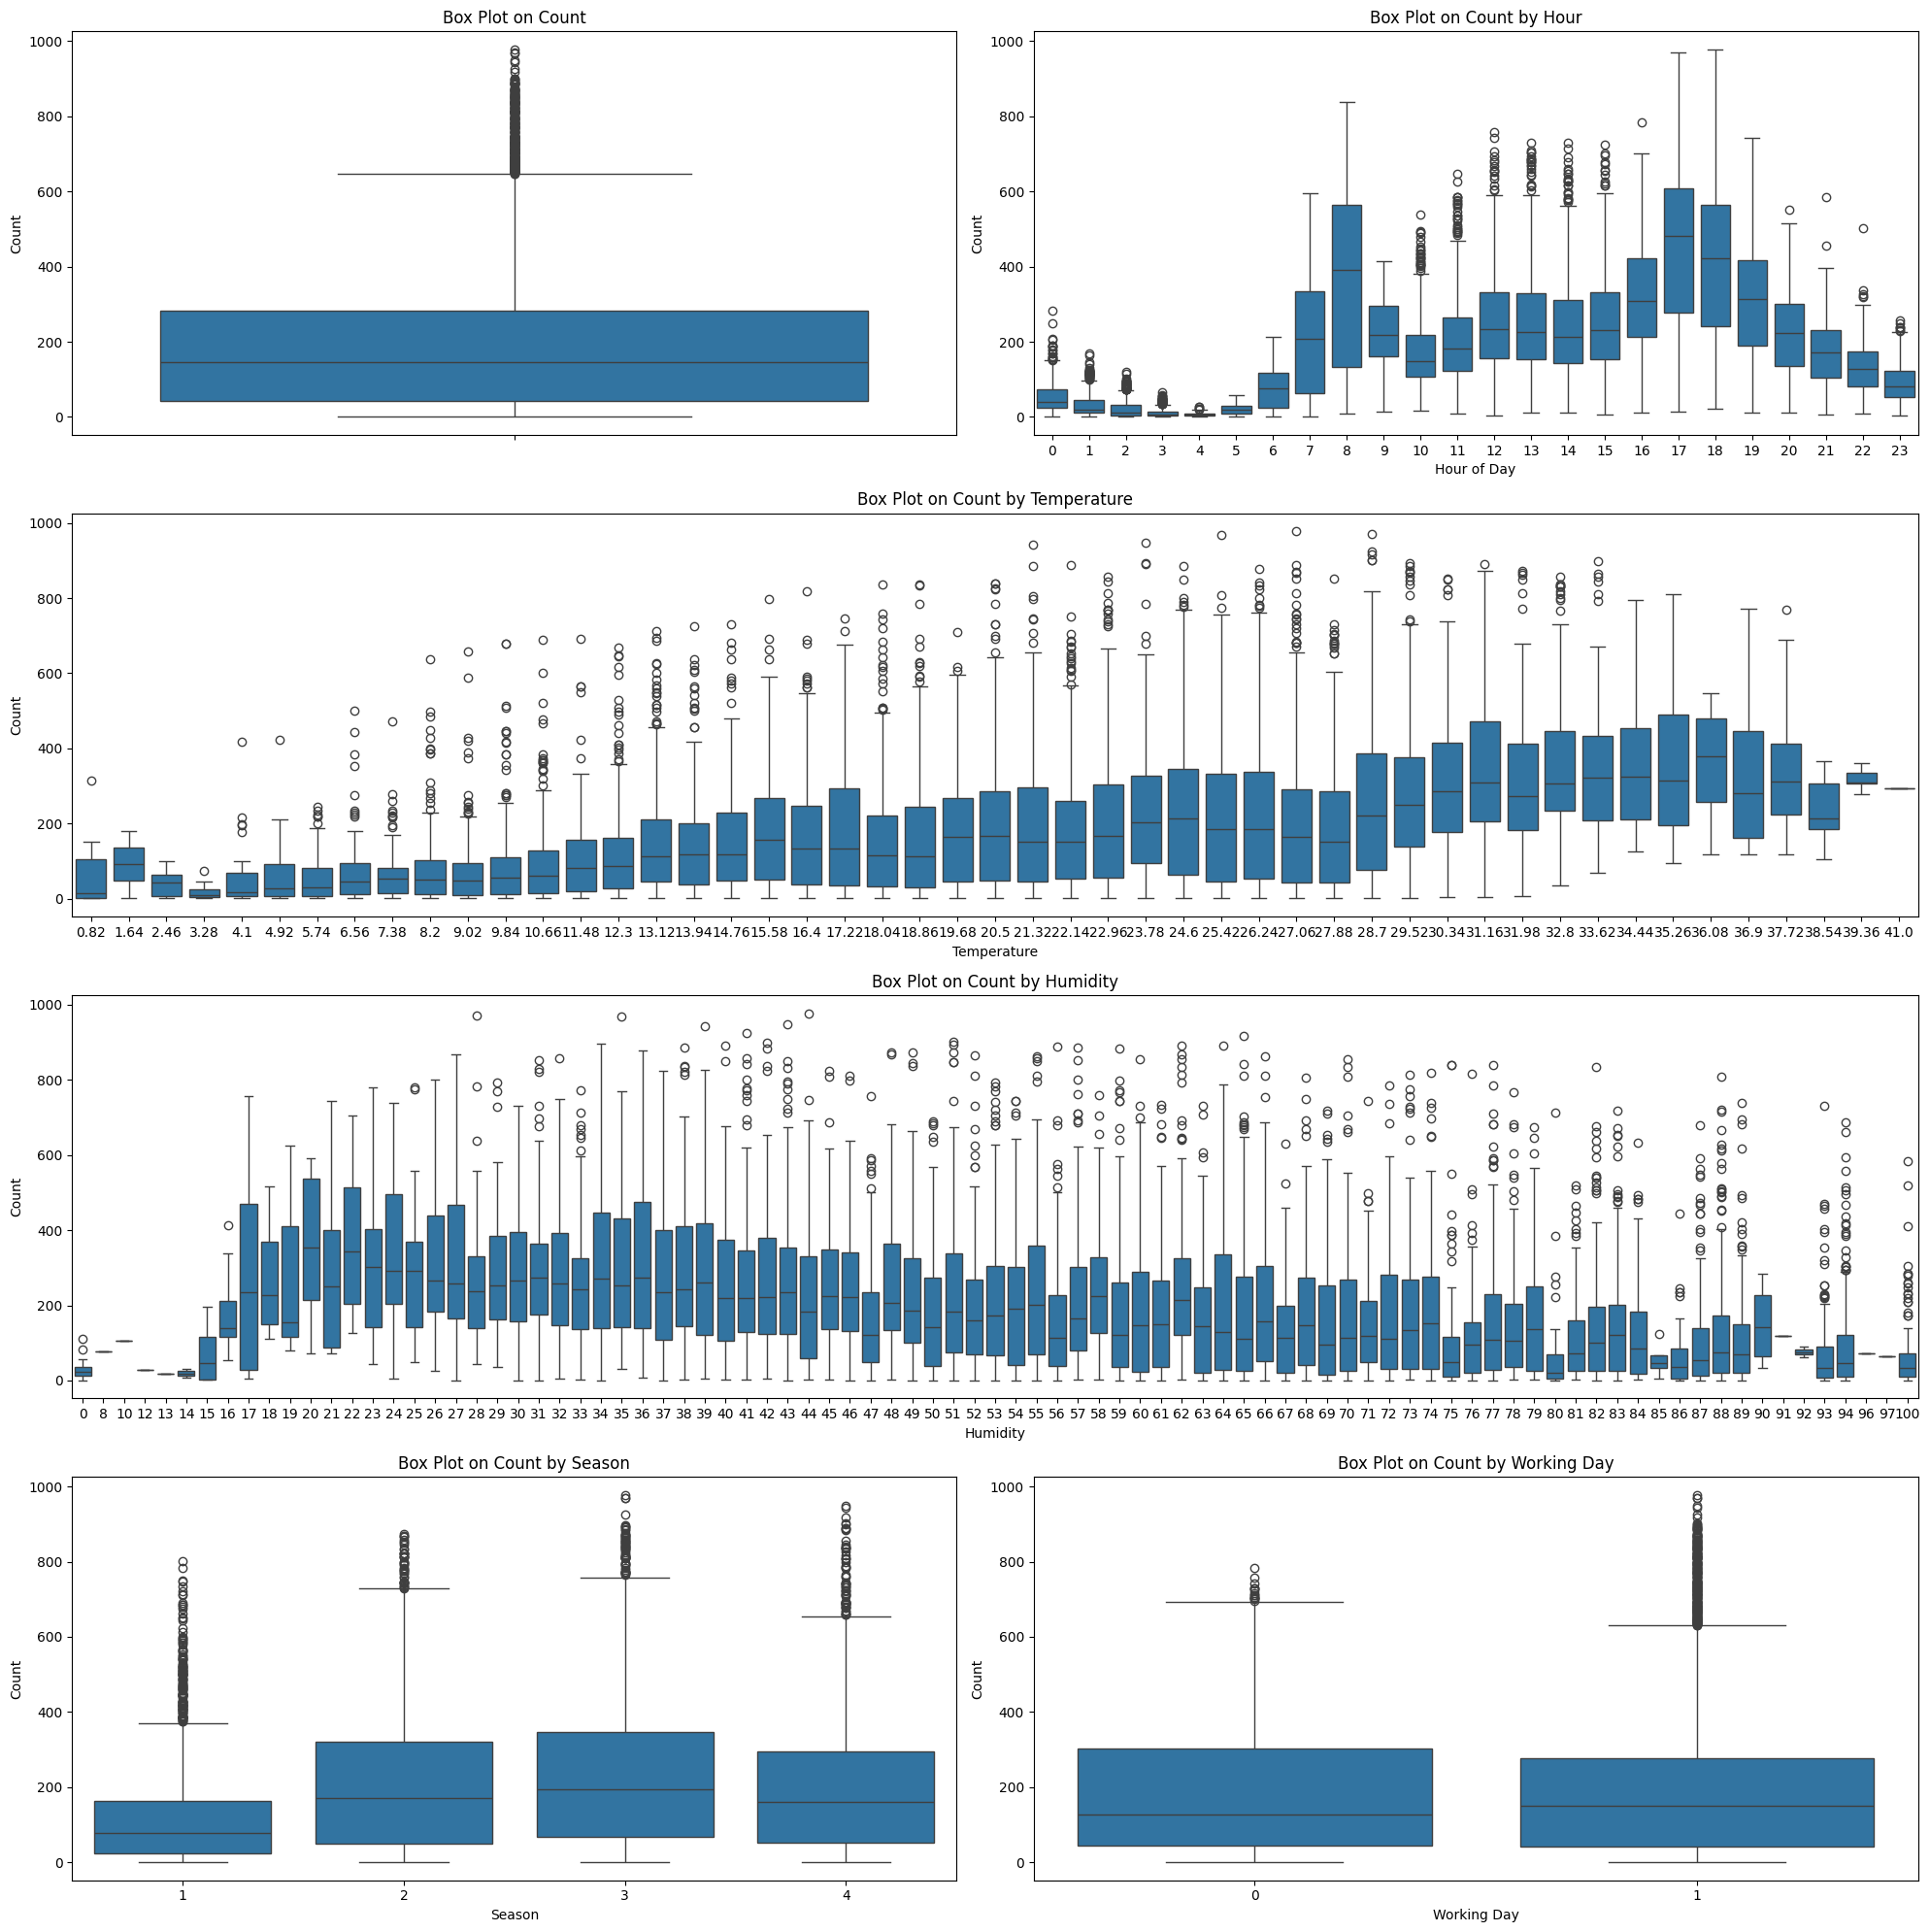

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1])

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=train_df, y="count", orient="v", ax=ax00)
ax00.set(ylabel='Count', title="Box Plot on Count")
sns.boxplot(data=train_df, x="hour", y="count", orient="v", ax=ax01)
ax01.set(xlabel='Hour of Day', ylabel='Count', title="Box Plot on Count by Hour")

ax10 = fig.add_subplot(gs[1, :])
sns.boxplot(data=train_df, x="temp", y="count", orient="v", ax=ax10)
ax10.set(xlabel='Temperature', ylabel='Count', title="Box Plot on Count by Temperature")

ax20 = fig.add_subplot(gs[2, :])
sns.boxplot(data=train_df, x="humidity", y="count", orient="v", ax=ax20)
ax20.set(xlabel='Humidity', ylabel='Count', title="Box Plot on Count by Humidity")

ax30 = fig.add_subplot(gs[3, 0])
ax31 = fig.add_subplot(gs[3, 1])
sns.boxplot(data=train_df, x="season", y="count", orient="v", ax=ax30)
ax30.set(xlabel='Season', ylabel='Count', title="Box Plot on Count by Season")
sns.boxplot(data=train_df, x="workingday", y="count", orient="v", ax=ax31)
ax31.set(xlabel='Working Day', ylabel='Count', title="Box Plot on Count by Working Day")

plt.tight_layout()
plt.show()

## **Feature Engineering**

**count variable**

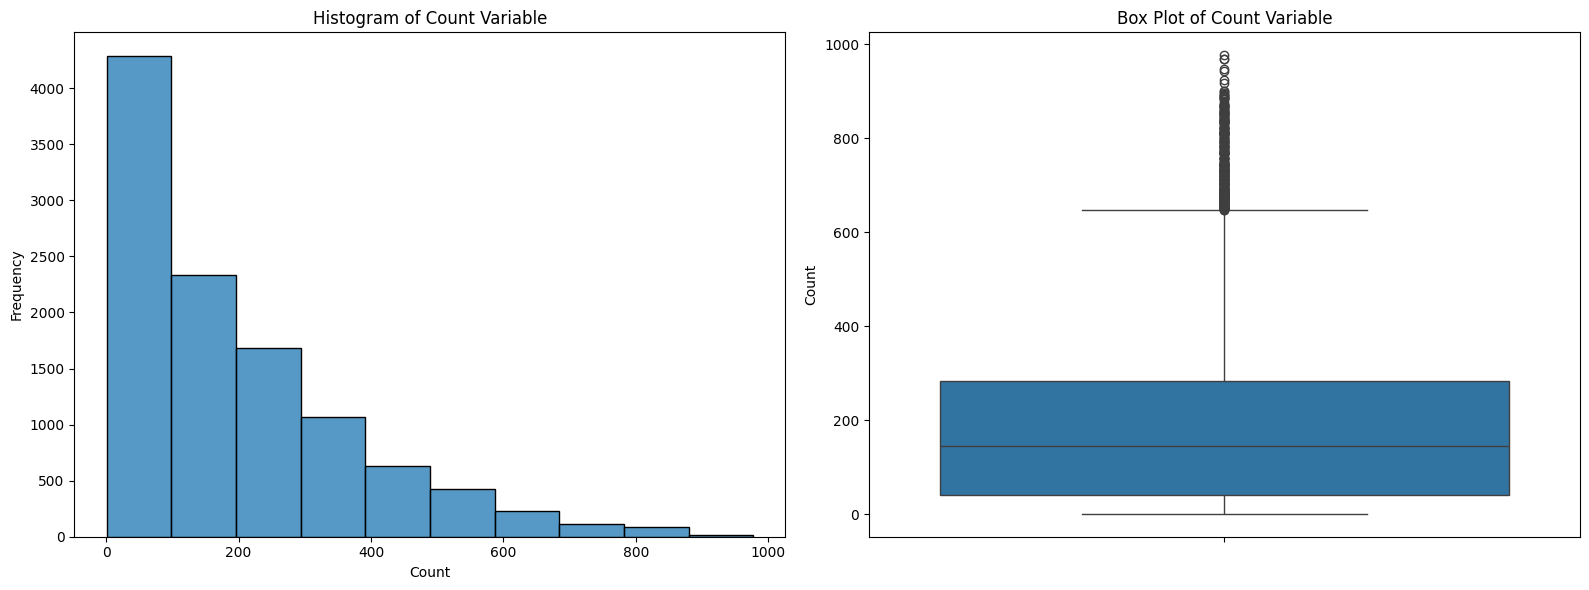

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
sns.histplot(data=train_df, x='count', bins=10, ax=axes[0])
axes[0].set_title('Histogram of Count Variable')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(data=train_df, y='count', ax=axes[1])
axes[1].set_title('Box Plot of Count Variable')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Outlier Removal Using 3-Sigma Rule
mean_count = train_df['count'].mean()
std_count = train_df['count'].std()

condition = np.abs(train_df['count'] - mean_count) <= (3 * std_count)
train_df_wo_outliers = train_df[condition].copy()

print("Shape Before Outliers Removal:", train_df.shape)
print("Shape After Outliers Removal :", train_df_wo_outliers.shape)

Shape Before Outliers Removal: (10886, 16)
Shape After Outliers Removal : (10739, 16)


**Log-transforming the count variable**

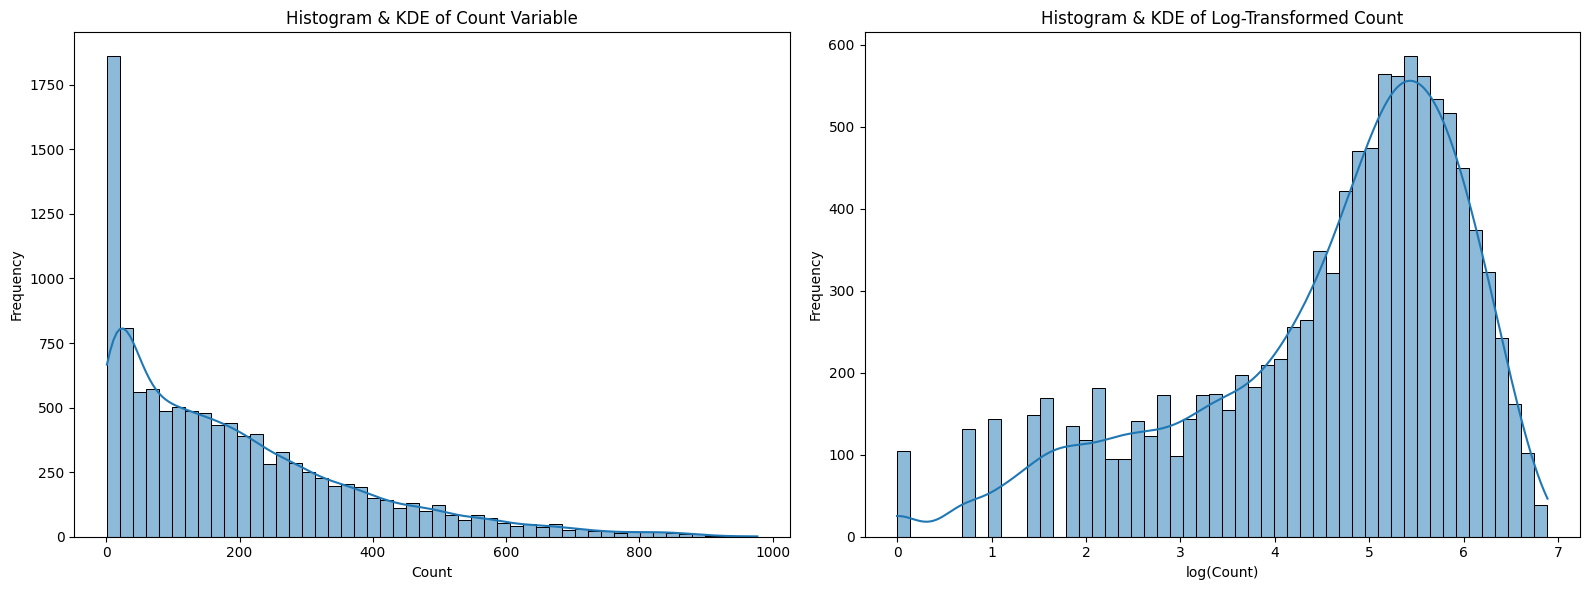

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Original count distribution with KDE
sns.histplot(train_df['count'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram & KDE of Count Variable')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')

# Log-transformed count distribution with KDE
sns.histplot(np.log(train_df['count']), bins=50, kde=True, ax=axes[1])
axes[1].set_title('Histogram & KDE of Log-Transformed Count')
axes[1].set_xlabel('log(Count)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**year, month, day, hour**

In [ ]:
for col in ['year', 'month', 'day', 'hour']:
  unique_values = train_df[col].unique()
  unique_values.sort()
  print(col)
  print(unique_values)

year
[2011 2012]
month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
for col in ['year', 'month', 'day', 'hour']:
    unique_values = test_df[col].unique()
    unique_values.sort()
    print(col)
    print(unique_values)

year
[2011 2012]
month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
day
[20 21 22 23 24 25 26 27 28 29 30 31]
hour
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


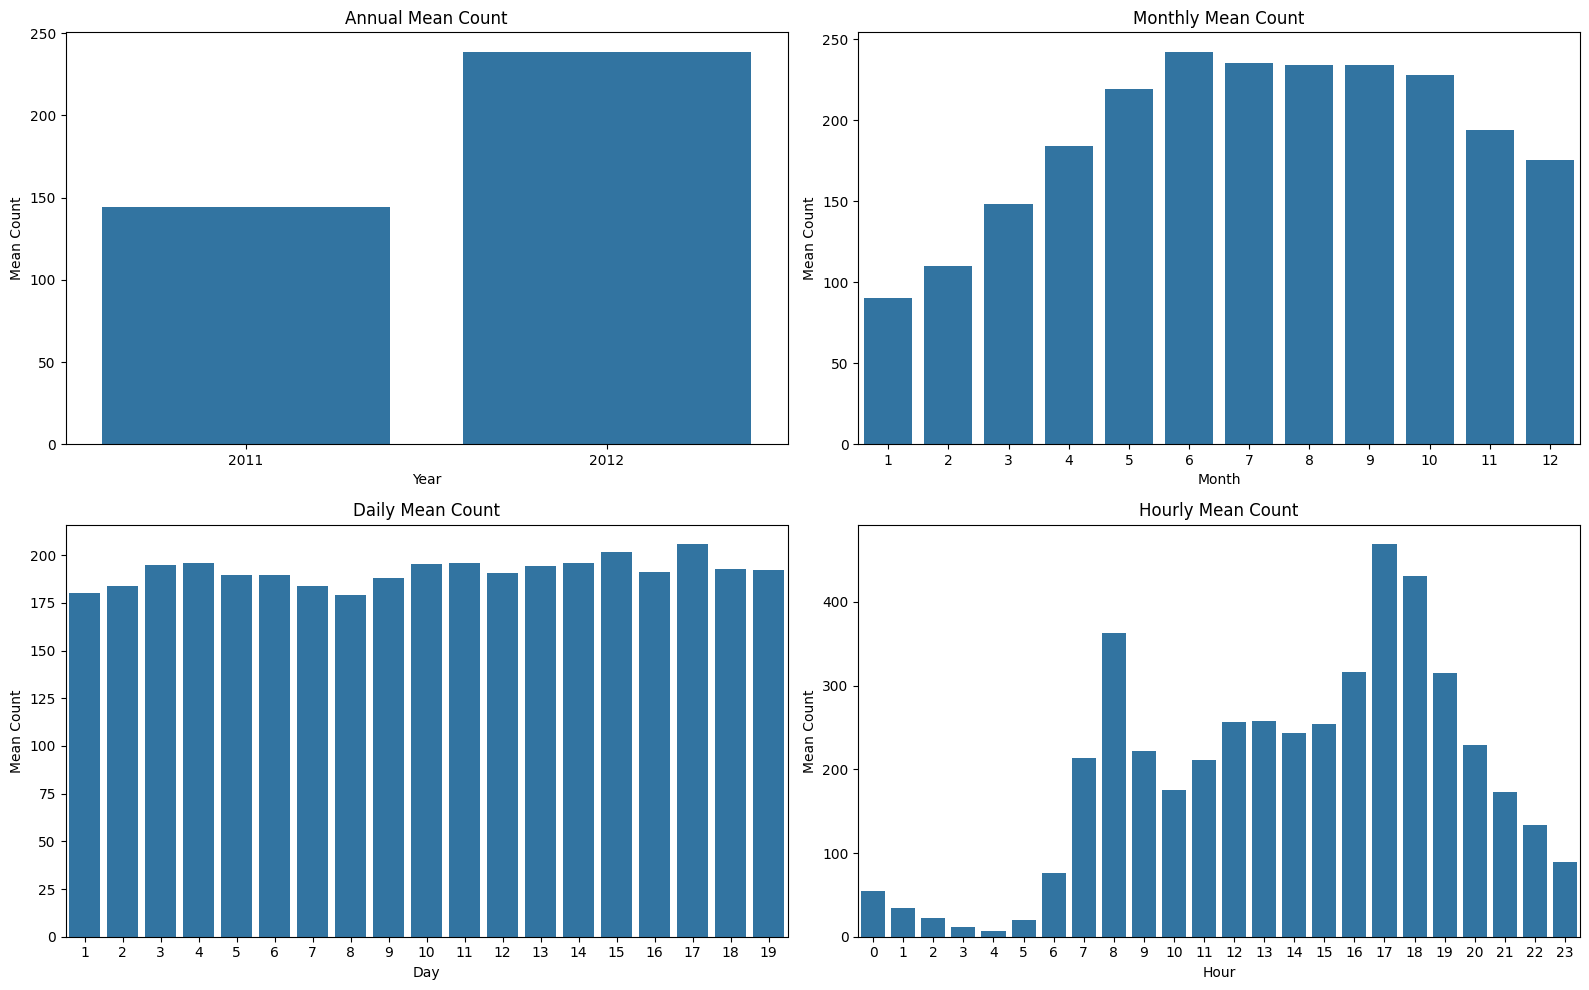

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Annual Mean Count
sns.barplot(data=train_df, x='year', y='count', errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Annual Mean Count')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Mean Count')

# Monthly Mean Count
sns.barplot(data=train_df, x='month', y='count', errorbar=None, ax=axes[0, 1])
axes[0, 1].set_title('Monthly Mean Count')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Mean Count')

# Daily Mean Count
sns.barplot(data=train_df, x='day', y='count', errorbar=None, ax=axes[1, 0])
axes[1, 0].set_title('Daily Mean Count')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Mean Count')

# Hourly Mean Count
sns.barplot(data=train_df, x='hour', y='count', errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title('Hourly Mean Count')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Mean Count')

plt.tight_layout()
plt.show()

**Adding day_of_week Feature**

In [ ]:
train_df['day_of_week'] = train_df['datetime'].dt.dayofweek
test_df['day_of_week'] = test_df['datetime'].dt.dayofweek

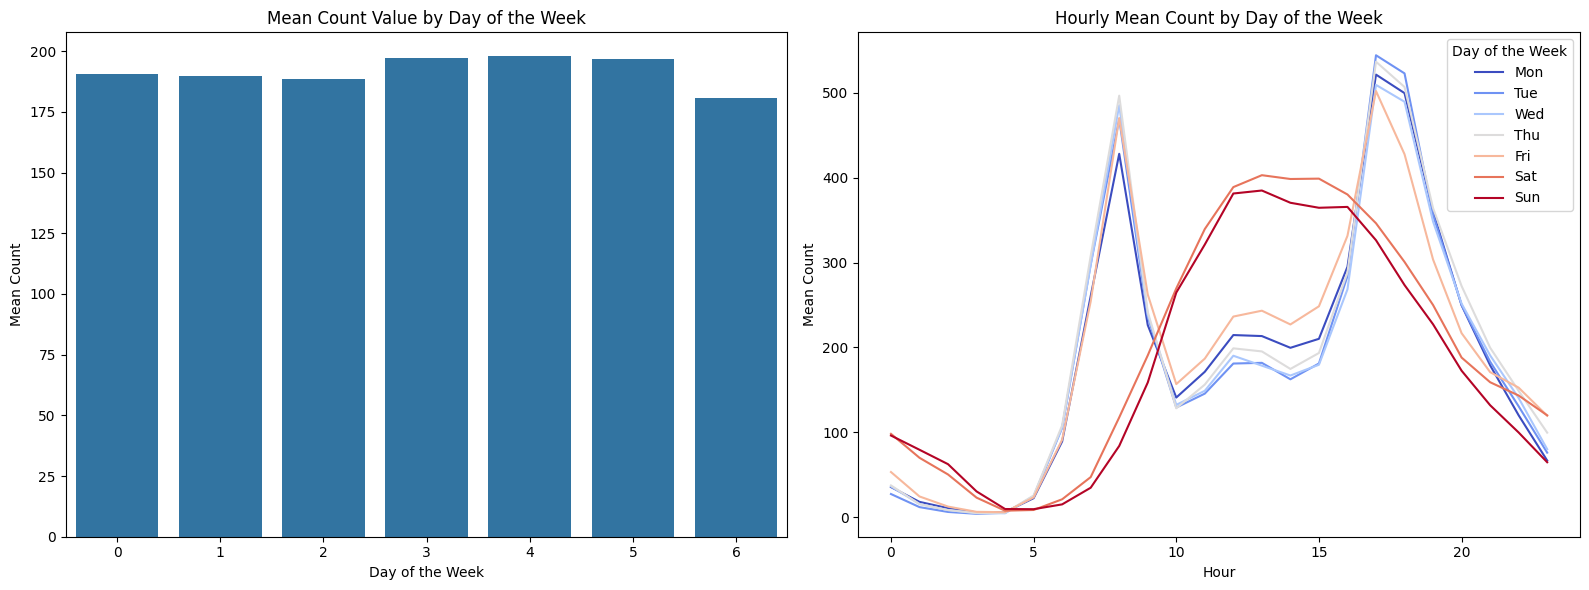

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean count by day of the week (barplot)
sns.barplot(data=train_df, x='day_of_week', y='count', errorbar=None, ax=axes[0])
axes[0].set_title('Mean Count Value by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Mean Count')

# Hourly mean count by day of the week (lineplot)
dow_labels = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
sns.lineplot(data=train_df, x='hour', y='count', hue='day_of_week', errorbar=None, palette='coolwarm', ax=axes[1])
axes[1].set_title('Hourly Mean Count by Day of the Week')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Mean Count')
axes[1].legend(title='Day of the Week')

handles, labels = axes[1].get_legend_handles_labels()
labels = [dow_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
axes[1].legend(handles=handles, labels=labels, title='Day of the Week')

plt.tight_layout()
plt.show()

**Hourly Mean Bike Rental Count by Year, Season, Weather, and User Type**

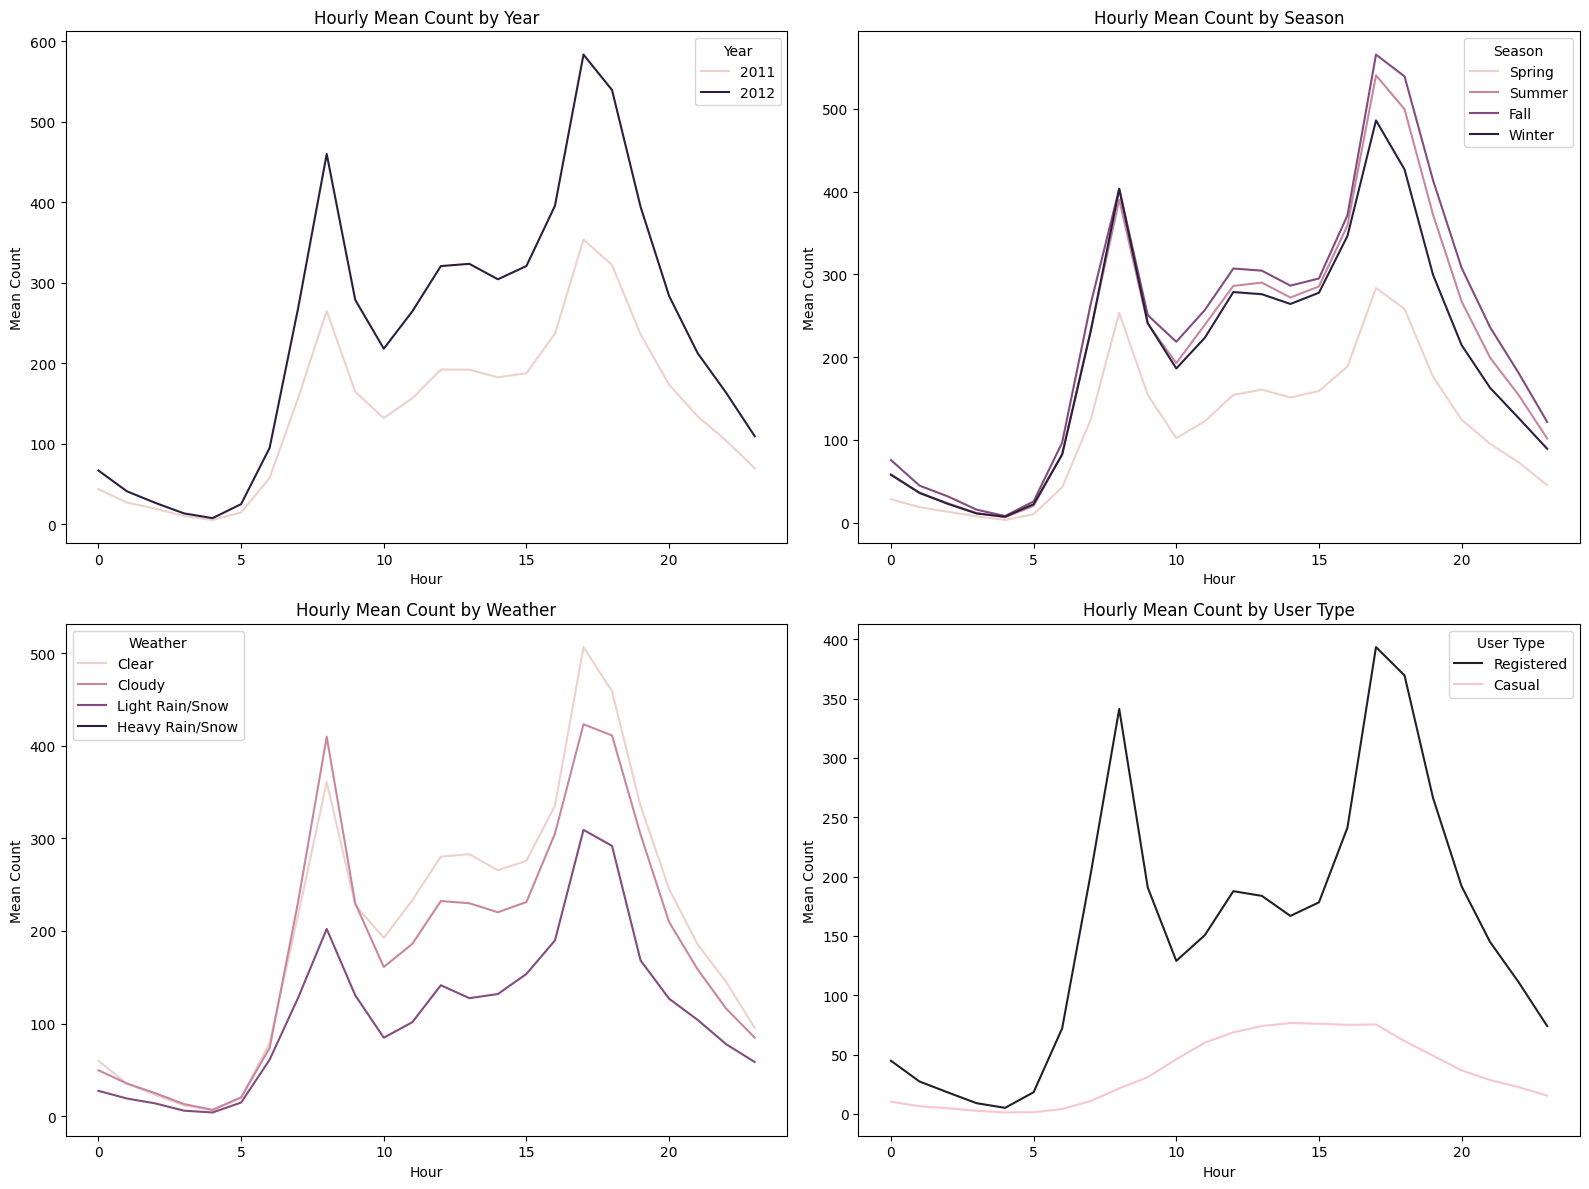

In [ ]:
# Legend label mapping
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_labels = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# By year
sns.lineplot(data=train_df, x='hour', y='count', hue='year', errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Hourly Mean Count by Year')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Mean Count')
axes[0, 0].legend(title='Year')

# By season
sns.lineplot(data=train_df, x='hour', y='count', hue='season', errorbar=None, ax=axes[0, 1])
axes[0, 1].set_title('Hourly Mean Count by Season')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Mean Count')
axes[0, 1].legend(title='Season')
handles, labels = axes[0, 1].get_legend_handles_labels()
labels = [season_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
axes[0, 1].legend(handles=handles, labels=labels, title='Season')

# By weather condition
sns.lineplot(data=train_df, x='hour', y='count', hue='weather', errorbar=None, ax=axes[1, 0])
axes[1, 0].set_title('Hourly Mean Count by Weather')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Mean Count')
axes[1, 0].legend(title='Weather')
handles, labels = axes[1, 0].get_legend_handles_labels()
labels = [weather_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
axes[1, 0].legend(handles=handles, labels=labels, title='Weather')

# By user type (registered/casual)
sns.lineplot(data=train_df, x='hour', y='registered', label='Registered', color='#231f29', errorbar=None, ax=axes[1, 1])
sns.lineplot(data=train_df, x='hour', y='casual', label='Casual', color='#f7c6ce', errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title('Hourly Mean Count by User Type')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Mean Count')
axes[1, 1].legend(title='User Type')

plt.tight_layout()
plt.show()

In 2012, overall hourly patterns were similar to those in 2011 but the total rental volume was higher; while rental counts varied by season and weather, demand tended to decrease especially in spring or during bad weather, and whereas registered users concentrated their rentals during commute hours, casual users showed more even usage throughout the day.

In [ ]:
train_df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


**Dropping 'atemp' (Highly Correlated with 'temp', corr = 0.98)**

In [ ]:
train_df['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [ ]:
train_df['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

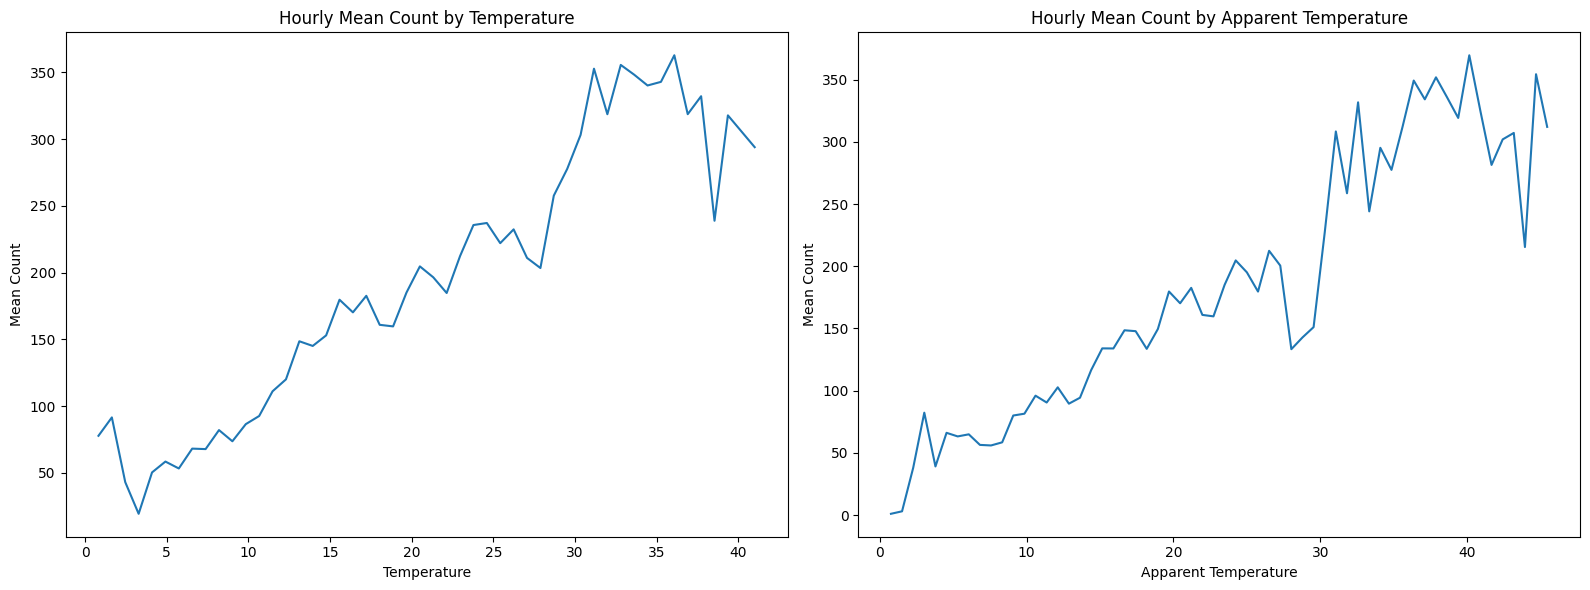

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# By actual temperature (temp)
sns.lineplot(data=train_df, x='temp', y='count', errorbar=None, ax=axes[0])
axes[0].set_title('Hourly Mean Count by Temperature')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Mean Count')

# By apparent temperature (atemp)
sns.lineplot(data=train_df, x='atemp', y='count', errorbar=None, ax=axes[1])
axes[1].set_title('Hourly Mean Count by Apparent Temperature')
axes[1].set_xlabel('Apparent Temperature')
axes[1].set_ylabel('Mean Count')

plt.tight_layout()
plt.show()

Both temperature and apparent temperature show a clear upward trend with bike rental counts, and since their correlation coefficient is as high as 0.98, we will drop the 'atemp' column to prevent multicollinearity.

In [ ]:
train_df = train_df.drop('atemp', axis=1)
test_df = test_df.drop('atemp', axis=1)

**humidity**

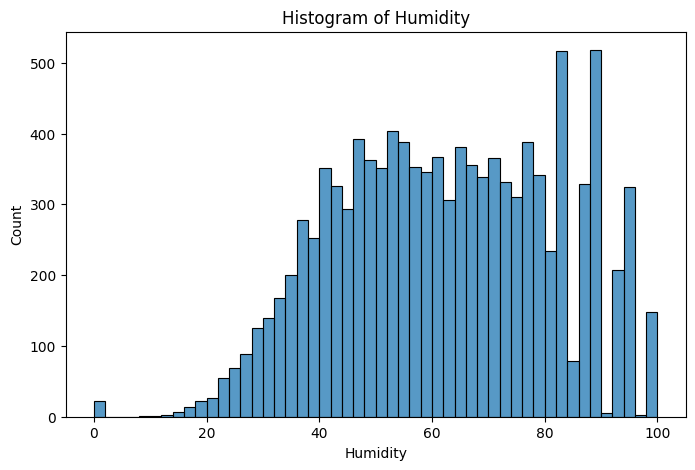

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['humidity'], bins=50)
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

In [ ]:
train_df['humidity'].min()

0

In [ ]:
len(train_df[train_df['humidity'] == 0])

22

In [ ]:
avg_humidity = train_df.humidity.mean()
train_df.loc[train_df['humidity'] == 0, 'humidity'] = avg_humidity

A humidity value of 0 is likely an outlier and not realistic, so these values were replaced with the mean humidity.

**Visualization of Bike Rentals by Humidity**

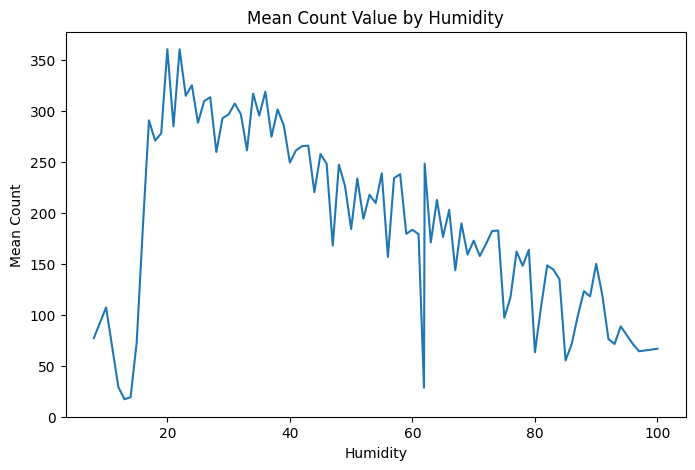

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=train_df, x='humidity', y='count', errorbar=None)
plt.title('Mean Count Value by Humidity')
plt.xlabel('Humidity')
plt.ylabel('Mean Count')
plt.show()

Overall, as humidity increases, the average number of bike rentals gradually decreases, and it appears that the highest rental counts occur when the humidity is in the low twenties.

**holiday, workingday, day of the week**

In [ ]:
train_df['holiday'].value_counts()

,count
holiday,
0,10575
1,311


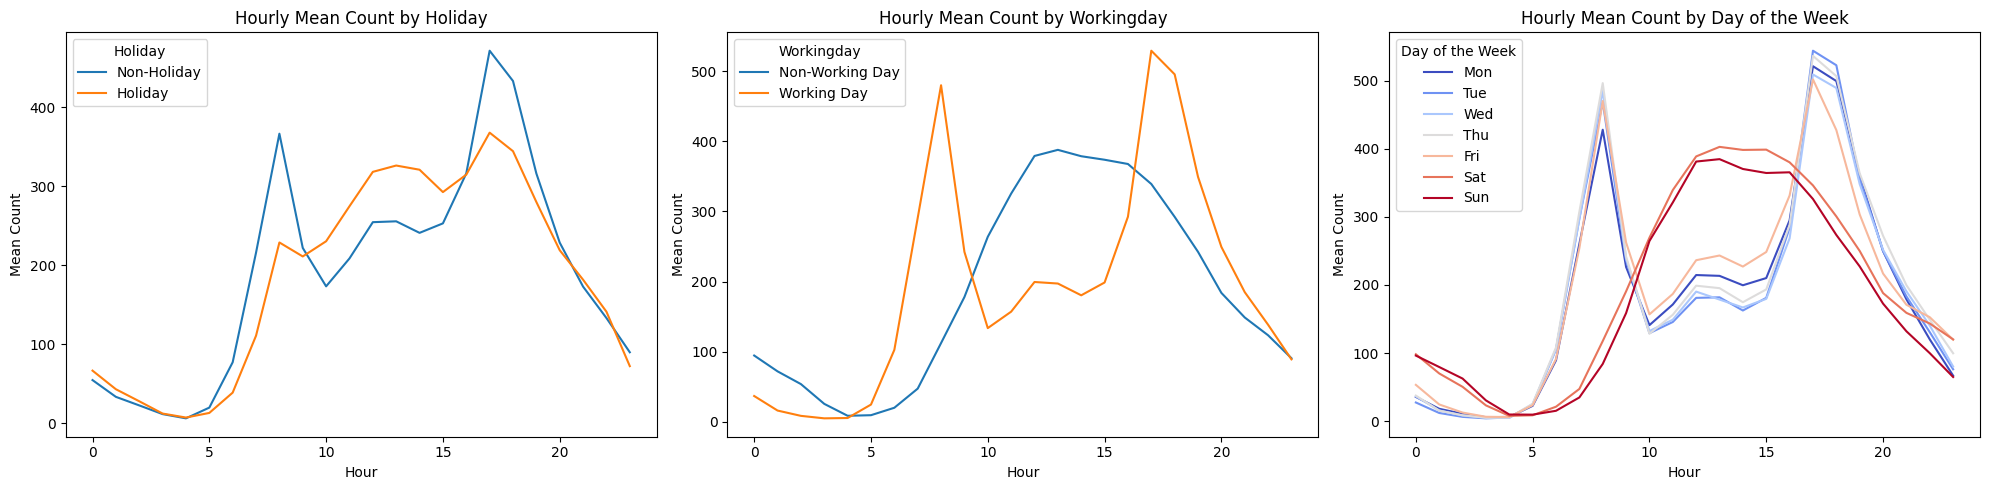

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# 1. Holiday
sns.lineplot(ax=axes[0], data=train_df, x='hour', y='count', hue='holiday', errorbar=None)
axes[0].set_title('Hourly Mean Count by Holiday')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Mean Count')
holiday_labels = {0: 'Non-Holiday', 1: 'Holiday'}
handles, labels = axes[0].get_legend_handles_labels()
labels = [holiday_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
axes[0].legend(handles=handles, labels=labels, title='Holiday')

# 2. Workingday
sns.lineplot(ax=axes[1], data=train_df, x='hour', y='count', hue='workingday', errorbar=None)
axes[1].set_title('Hourly Mean Count by Workingday')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Mean Count')
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
handles, labels = axes[1].get_legend_handles_labels()
labels = [workingday_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
axes[1].legend(handles=handles, labels=labels, title='Workingday')

# 3. Day of the Week
dow_labels = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
sns.lineplot(ax=axes[2], data=train_df, x='hour', y='count', hue='day_of_week', errorbar=None, palette='coolwarm')
axes[2].set_title('Hourly Mean Count by Day of the Week')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Mean Count')
handles, labels = axes[2].get_legend_handles_labels()
labels = [dow_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
axes[2].legend(handles=handles, labels=labels, title='Day of the Week')

plt.tight_layout()
plt.show()

Since holidays account for only about 3% of the data, this indicates that the holiday variable refers not to regular weekends but to special public holidays such as Christmas. On holidays, hourly changes in bike rentals are less pronounced, and comparing working days to non-working days reveals even clearer differences in rental patterns. When looking at the day_of_week variable, weekdays (Monday-Friday) show almost the same rental patterns as the workingday variable, with Fridays exhibiting slightly different trends due to being adjacent to the weekend, and the day before a public holiday can also differ from regular weekdays or working days.

**Adding the daytype variable**

Reflecting the differences in bike rental patterns by holiday, working day, and day of the week, the daytype variable is used to separate Fridays from other working days. Fridays (day_of_week = 4) are labeled as 1, non-working days (workingday = 0) are labeled as 2, and all other days are labeled as 0. When a Friday is also a non-working day, it is labeled as 2 to give priority to holidays and weekends. In the legend, 0 is displayed as 'Weekday', 1 as 'Friday', and 2 as 'Holiday/Weekend'.

In [ ]:
train_df['daytype'] = 0
train_df.loc[train_df['day_of_week'] == 4, 'daytype'] = 1  # Friday
train_df.loc[train_df['workingday'] == 0, 'daytype'] = 2   # Holiday/Weekend

test_df['daytype'] = 0
test_df.loc[test_df['day_of_week'] == 4, 'daytype'] = 1  # Friday
test_df.loc[test_df['workingday'] == 0, 'daytype'] = 2   # Holiday/Weekend

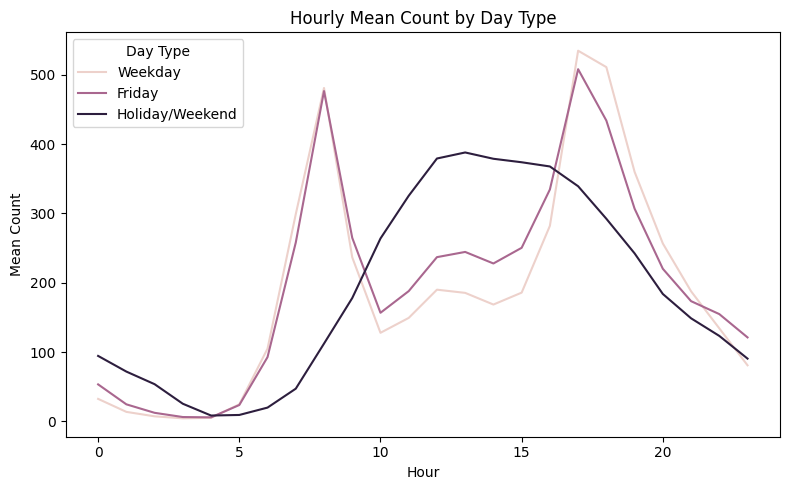

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=train_df, x='hour', y='count', hue='daytype', errorbar=None)

daytype_labels = {0: 'Weekday', 1: 'Friday', 2: 'Holiday/Weekend'}

handles, labels = ax.get_legend_handles_labels()
labels = [daytype_labels.get(int(lbl), lbl) if lbl.isdigit() else lbl for lbl in labels]
ax.legend(handles=handles, labels=labels, title='Day Type')

plt.title('Hourly Mean Count by Day Type')
plt.xlabel('Hour')
plt.ylabel('Mean Count')
plt.tight_layout()
plt.show()

**Dropping the workingday variable**

In [ ]:
train_df = train_df.drop(columns='workingday')
test_df = test_df.drop(columns='workingday')

# **Modeling**

In [ ]:
!pip install catboost lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.2 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.3 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

import optuna
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

from sklearn.metrics import mean_squared_log_error

**Separating features (X) and target (y)**

In [ ]:
def separate_train(df):
    X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
    y = df['count']
    return X, y

def separate_test(df):
    X_test = df.drop('datetime', axis=1)
    return X_test

In [ ]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)

print(f'Train data shape: {X.shape}')
print(f'Number of null values: {X.isna().sum().sum()}')
print(f'\nTest data shape: {X_test.shape}')
print(f'Number of null values: {X_test.isna().sum().sum()}')

Train data shape: (10886, 12)
Number of null values: 0

Test data shape: (6493, 12)
Number of null values: 0


**Linear Regression**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, np.log1p(y_train))

y_valid_pred = model.predict(X_valid)
y_valid_pred = np.maximum(1, np.expm1(y_valid_pred))

rmsle = np.sqrt(mean_squared_log_error(y_valid, y_valid_pred))
print(f'\nValidation Data RMSLE: {rmsle:.5f}')

y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(1, np.expm1(y_test_pred))


Validation Data RMSLE: 1.02250


**Ensemble Modeling and Hyperparameter Tuning with Optuna**

In [ ]:
X, y = separate_train(train_df)
X_test = separate_test(test_df)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def optuna_objective_reg(trial, model_name, X_tr, y_tr, X_val, y_val):
    if model_name == 'LightGBM':
        import lightgbm as lgb
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 16),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'num_leaves': trial.suggest_int('num_leaves', 20, 100),
            'random_state': 42
        }
        model = lgb.LGBMRegressor(**params, verbose=-1)
    elif model_name == 'XGBoost':
        import xgboost as xgb
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 16),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
            'random_state': 42
        }
        model = xgb.XGBRegressor(**params, verbosity=0)
    elif model_name == 'CatBoost':
        from catboost import CatBoostRegressor
        params = {
            'iterations': trial.suggest_int('iterations', 100, 300),
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'random_state': 42,
            'verbose': 0
        }
        model = CatBoostRegressor(**params)
    elif model_name == 'RandomForest':
        from sklearn.ensemble import RandomForestRegressor
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 16)
        }
        model = RandomForestRegressor(**params, random_state=42)
    elif model_name == 'Linear':
        from sklearn.linear_model import Ridge
        params = {
            'alpha': trial.suggest_float('alpha', 0.1, 5.0)
        }
        model = Ridge(**params)
    else:
        raise ValueError('Unknown model')
    model.fit(X_tr, np.log1p(y_tr))
    y_pred = model.predict(X_val)
    y_pred = np.maximum(1, np.expm1(y_pred))
    return np.sqrt(mean_squared_log_error(y_val, y_pred))

In [ ]:
model_list = ['LightGBM', 'XGBoost', 'CatBoost', 'RandomForest', 'Linear']
optuna_results = []
best_models = {}

for model_name in model_list:
    print(f"[Optuna] {model_name} tuning...")
    study = optuna.create_study(direction='minimize', study_name=model_name,
                                sampler=optuna.samplers.TPESampler(seed=42))
    func = lambda trial: optuna_objective_reg(trial, model_name, X_train, y_train, X_valid, y_valid)
    study.optimize(func, n_trials=25, show_progress_bar=True)
    best_params = study.best_trial.params
    best_score = study.best_trial.value

    if model_name == 'LightGBM':
        import lightgbm as lgb
        best_model = lgb.LGBMRegressor(**best_params, random_state=42, verbose=-1)
    elif model_name == 'XGBoost':
        import xgboost as xgb
        best_model = xgb.XGBRegressor(**best_params, random_state=42, verbosity=0)
    elif model_name == 'CatBoost':
        from catboost import CatBoostRegressor
        best_model = CatBoostRegressor(**best_params, random_state=42, verbose=0)
    elif model_name == 'RandomForest':
        from sklearn.ensemble import RandomForestRegressor
        best_model = RandomForestRegressor(**best_params, random_state=42)
    elif model_name == 'Linear':
        from sklearn.linear_model import Ridge
        best_model = Ridge(**best_params)
    best_model.fit(X_train, np.log1p(y_train))
    best_models[model_name] = best_model

    # Validation and Test evaluation
    y_pred_val = np.maximum(1, np.expm1(best_model.predict(X_valid)))
    rmsle_val = np.sqrt(mean_squared_log_error(y_valid, y_pred_val))

    y_pred_test = np.maximum(1, np.expm1(best_model.predict(X_test)))

    optuna_results.append({
        'model': model_name,
        'best_params': best_params,
        'rmsle_val': rmsle_val,
        'y_pred_test': y_pred_test
    })

[I 2025-07-16 12:51:51,469] A new study created in memory with name: LightGBM


[Optuna] LightGBM tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-16 12:51:51,746] Trial 0 finished with value: 0.28001794371576993 and parameters: {'n_estimators': 175, 'max_depth': 16, 'learning_rate': 0.14907884894416698, 'num_leaves': 68}. Best is trial 0 with value: 0.28001794371576993.
[I 2025-07-16 12:51:51,877] Trial 1 finished with value: 0.37784174180134783 and parameters: {'n_estimators': 131, 'max_depth': 6, 'learning_rate': 0.021035886311957897, 'num_leaves': 90}. Best is trial 0 with value: 0.28001794371576993.
[I 2025-07-16 12:51:52,271] Trial 2 finished with value: 0.3227219732149193 and parameters: {'n_estimators': 220, 'max_depth': 13, 'learning_rate': 0.013911053916202464, 'num_leaves': 98}. Best is trial 0 with value: 0.28001794371576993.
[I 2025-07-16 12:51:52,454] Trial 3 finished with value: 0.2920834155874009 and parameters: {'n_estimators': 267, 'max_depth': 6, 'learning_rate': 0.04454674376934912, 'num_leaves': 34}. Best is trial 0 with value: 0.28001794371576993.
[I 2025-07-16 12:51:52,597] Trial 4 finished with 

[I 2025-07-16 12:51:58,423] A new study created in memory with name: XGBoost


[Optuna] XGBoost tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-16 12:52:01,478] Trial 0 finished with value: 0.3633078083461853 and parameters: {'n_estimators': 175, 'max_depth': 16, 'learning_rate': 0.14907884894416698, 'subsample': 0.8795975452591109, 'colsample_bytree': 0.7468055921327309}. Best is trial 0 with value: 0.3633078083461853.
[I 2025-07-16 12:52:01,560] Trial 1 finished with value: 0.29404380643656236 and parameters: {'n_estimators': 131, 'max_depth': 4, 'learning_rate': 0.1745734676972377, 'subsample': 0.8803345035229626, 'colsample_bytree': 0.9124217733388136}. Best is trial 1 with value: 0.29404380643656236.
[I 2025-07-16 12:52:02,589] Trial 2 finished with value: 0.3652919581097986 and parameters: {'n_estimators': 104, 'max_depth': 16, 'learning_rate': 0.16816410175208013, 'subsample': 0.7637017332034828, 'colsample_bytree': 0.7545474901621302}. Best is trial 1 with value: 0.29404380643656236.
[I 2025-07-16 12:52:02,743] Trial 3 finished with value: 0.28174120341195397 and parameters: {'n_estimators': 136, 'max_depth'

[I 2025-07-16 12:52:11,087] A new study created in memory with name: CatBoost


[Optuna] CatBoost tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-16 12:52:11,803] Trial 0 finished with value: 0.2705618599065347 and parameters: {'iterations': 175, 'depth': 10, 'learning_rate': 0.14907884894416698}. Best is trial 0 with value: 0.2705618599065347.
[I 2025-07-16 12:52:12,117] Trial 1 finished with value: 0.32797832450623216 and parameters: {'iterations': 220, 'depth': 5, 'learning_rate': 0.039638958863878505}. Best is trial 0 with value: 0.2705618599065347.
[I 2025-07-16 12:52:12,523] Trial 2 finished with value: 0.2779533322864937 and parameters: {'iterations': 111, 'depth': 10, 'learning_rate': 0.12421185223120967}. Best is trial 0 with value: 0.2705618599065347.
[I 2025-07-16 12:52:12,827] Trial 3 finished with value: 0.29086028441820744 and parameters: {'iterations': 242, 'depth': 4, 'learning_rate': 0.19428287191077892}. Best is trial 0 with value: 0.2705618599065347.
[I 2025-07-16 12:52:13,192] Trial 4 finished with value: 0.3129289449654664 and parameters: {'iterations': 267, 'depth': 5, 'learning_rate': 0.04454674

[I 2025-07-16 12:52:23,976] A new study created in memory with name: RandomForest


[Optuna] RandomForest tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-16 12:52:29,782] Trial 0 finished with value: 0.30105924814280555 and parameters: {'n_estimators': 175, 'max_depth': 16}. Best is trial 0 with value: 0.30105924814280555.
[I 2025-07-16 12:52:35,208] Trial 1 finished with value: 0.31370166046385145 and parameters: {'n_estimators': 247, 'max_depth': 11}. Best is trial 0 with value: 0.30105924814280555.
[I 2025-07-16 12:52:36,682] Trial 2 finished with value: 0.4944006546244103 and parameters: {'n_estimators': 131, 'max_depth': 6}. Best is trial 0 with value: 0.30105924814280555.
[I 2025-07-16 12:52:40,142] Trial 3 finished with value: 0.3031041563426002 and parameters: {'n_estimators': 111, 'max_depth': 15}. Best is trial 0 with value: 0.30105924814280555.
[I 2025-07-16 12:52:46,069] Trial 4 finished with value: 0.30432606606868995 and parameters: {'n_estimators': 220, 'max_depth': 13}. Best is trial 0 with value: 0.30105924814280555.
[I 2025-07-16 12:52:49,478] Trial 5 finished with value: 0.30168959039465043 and parameters: 

[I 2025-07-16 12:54:16,582] A new study created in memory with name: Linear


[Optuna] Linear tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-16 12:54:16,600] Trial 0 finished with value: 1.0224898481817584 and parameters: {'alpha': 1.9352465823520764}. Best is trial 0 with value: 1.0224898481817584.
[I 2025-07-16 12:54:16,606] Trial 1 finished with value: 1.022472377494505 and parameters: {'alpha': 4.758500101408589}. Best is trial 1 with value: 1.022472377494505.
[I 2025-07-16 12:54:16,614] Trial 2 finished with value: 1.022478927458954 and parameters: {'alpha': 3.6867703148758855}. Best is trial 1 with value: 1.022472377494505.
[I 2025-07-16 12:54:16,622] Trial 3 finished with value: 1.0224829692709823 and parameters: {'alpha': 3.0334265725654794}. Best is trial 1 with value: 1.022472377494505.
[I 2025-07-16 12:54:16,631] Trial 4 finished with value: 1.0224966604319767 and parameters: {'alpha': 0.864491338167939}. Best is trial 1 with value: 1.022472377494505.
[I 2025-07-16 12:54:16,639] Trial 5 finished with value: 1.0224966611897275 and parameters: {'alpha': 0.864373149647393}. Best is trial 1 with value: 1.0

 **Ensemble Performance Comparison and Best Model Selection**

In [ ]:
def rmsle_score(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(1, y_pred)))

# Save individual model predictions
val_preds = {}
test_preds = {}
for name, model in best_models.items():
    val_preds[name] = np.maximum(1, np.expm1(model.predict(X_valid)))
    test_preds[name] = np.maximum(1, np.expm1(model.predict(X_test)))

# (1) Best single model
best_model_name = min(optuna_results, key=lambda x: x['rmsle_val'])['model']
best_single_val = val_preds[best_model_name]
best_single_test = test_preds[best_model_name]

# (2) Top 2 ensemble (top 2 models by validation RMSLE)
top2 = sorted(optuna_results, key=lambda x: x['rmsle_val'])[:2]
top2_names = [m['model'] for m in top2]
top2_val = np.mean([val_preds[n] for n in top2_names], axis=0)
top2_test = np.mean([test_preds[n] for n in top2_names], axis=0)

# (3) Linear + CatBoost + LightGBM ensemble
combo = ['Linear', 'CatBoost', 'LightGBM']
combo_val = np.mean([val_preds[n] for n in combo], axis=0)
combo_test = np.mean([test_preds[n] for n in combo], axis=0)

results_df = pd.DataFrame([
    {
        'Ensemble Type': 'Best Single (' + best_model_name + ')',
        'Validation RMSLE': rmsle_score(y_valid, best_single_val),
        'Combination': [best_model_name]
    },
    {
        'Ensemble Type': 'Top2 (' + '+'.join(top2_names) + ')',
        'Validation RMSLE': rmsle_score(y_valid, top2_val),
        'Combination': top2_names
    },
    {
        'Ensemble Type': 'Linear+CatBoost+LightGBM',
        'Validation RMSLE': rmsle_score(y_valid, combo_val),
        'Combination': combo
    }
])

results_df = results_df.sort_values(by='Validation RMSLE').reset_index(drop=True)

print('\n========= Model Performance Comparison (Ensemble vs. Single) =========')
print(results_df)
best_combination = results_df.loc[0, 'Combination']
print(f"\n*** Best Model/Ensemble: {best_combination} ***")


========= Model Performance Comparison (Ensemble vs. Single) =========
              Ensemble Type  Validation RMSLE                   Combination
0   Top2 (CatBoost+XGBoost)          0.264783           [CatBoost, XGBoost]
1    Best Single (CatBoost)          0.266784                    [CatBoost]
2  Linear+CatBoost+LightGBM          0.491155  [Linear, CatBoost, LightGBM]

*** Best Model/Ensemble: ['CatBoost', 'XGBoost'] ***


**Model Prediction Visualization: True vs. Predicted Count**

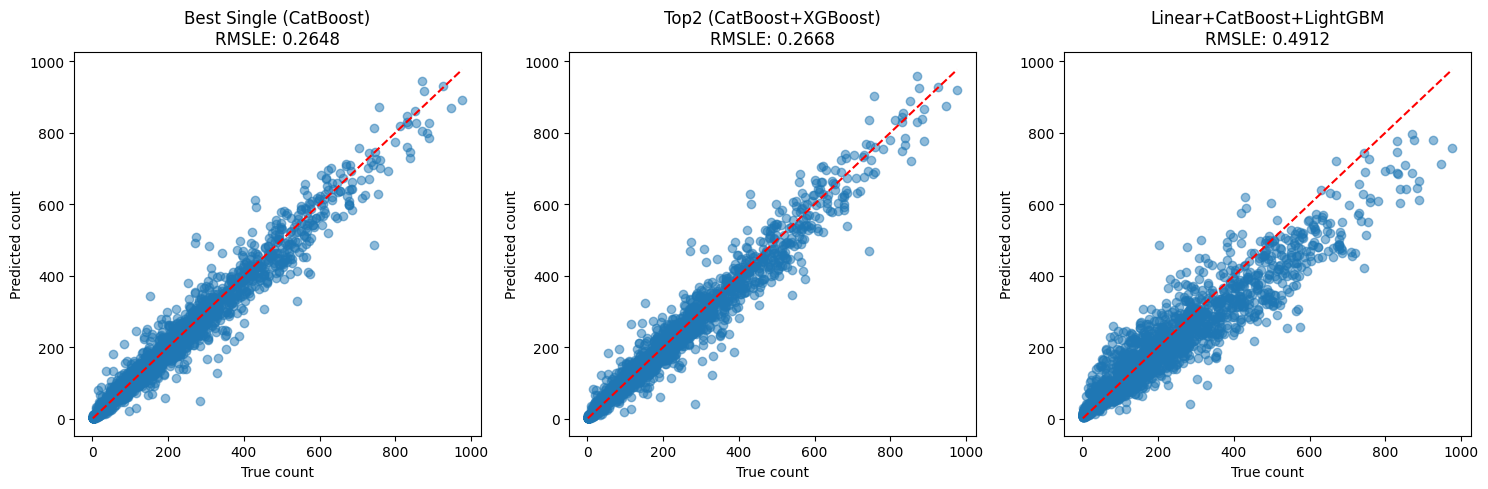

In [ ]:
plt.figure(figsize=(15, 5))

# 1. Best Single
plt.subplot(1, 3, 1)
plt.scatter(y_valid, best_single_val, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Best Single (' + best_model_name + ')\nRMSLE: {:.4f}'.format(results_df.iloc[0]['Validation RMSLE']))

# 2. Top2 Ensemble
plt.subplot(1, 3, 2)
plt.scatter(y_valid, top2_val, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Top2 (' + '+'.join(top2_names) + ')\nRMSLE: {:.4f}'.format(results_df.iloc[1]['Validation RMSLE']))

# 3. Linear+CatBoost+LightGBM
plt.subplot(1, 3, 3)
plt.scatter(y_valid, combo_val, alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Linear+CatBoost+LightGBM\nRMSLE: {:.4f}'.format(results_df.iloc[2]['Validation RMSLE']))

plt.tight_layout()
plt.show()

**Best Ensemble Prediction Result (CatBoost + LightGBM)**

In [ ]:
ensemble_pred_test = np.mean([test_preds['CatBoost'], test_preds['LightGBM']], axis=0)
prediction_df = pd.DataFrame({'predicted_count': ensemble_pred_test})
prediction_df.to_csv('bike_rental_predictions.csv', index=False)
result_df = pd.read_csv('bike_rental_predictions.csv')
result_df.head(10)

,predicted_count
0,12.513410
1,4.672181
2,3.516412
3,2.168425
4,1.766965
5,4.934250
6,32.030381
7,84.475082
8,201.777843
9,114.154836


## **IV. Conclusion**

### **Analysis**

There were no missing values in the original data. As a first step, I removed outliers based on the 3-sigma (three standard deviations) rule applied to the rental count ('count') variable, which improved both data reliability and model performance. Exploratory analysis revealed that rental demand sharply increases at 8 AM and 5–6 PM, with higher usage on weekdays compared to weekends and holidays. Visualization also showed distinct usage patterns by user type (Registered, Casual) and hour of the day. A very strong positive correlation (correlation coefficient = 0.98) was observed between actual temperature ('temp') and apparent temperature ('atemp'), so the 'atemp' feature was dropped to avoid multicollinearity.

In addition to core features such as weather, temperature, humidity, wind speed, season, holidays, and working day status, I engineered new features from the datetime variable, including month, day of week, hour, and daytype (weekday/Friday/non-working day). This feature engineering process enhanced the explanatory power of the data and allowed the model to capture the real-world complexity of bike rental demand.

### **Prediction**

For prediction, I experimented with several machine learning models, including linear regression, random forest, LightGBM, XGBoost, and CatBoost. Ensemble methods were applied, and hyperparameter optimization was performed using Optuna to further improve performance.

The best validation result, based on RMSLE, was achieved by the ensemble of CatBoost and XGBoost, which obtained an RMSLE of 0.2648. For comparison, the single CatBoost model achieved an RMSLE of 0.2668, indicating a slight improvement through ensemble modeling.

The final model achieved substantial predictive accuracy when evaluated on a hold-out validation set, with predicted rental counts closely aligning with the actual observed values across different hours, days, and weather conditions.